# Distance Euclidienne

In [1]:
from cookie_clusters import *

In [2]:
import os
import cv2
import rasterio as rio
import re
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import Kmeans, DBSCAN, OPTICS, HDBSCAN from sklearn.
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering

In [3]:
# List and dict of target pixels
pixels_de_interet, dic_de_pixels = create_dic_pixels()

In [4]:
dir = "../../ressources/images"
images_list = os.listdir(dir)

images_2A = list()
images_2B = list()
prog = re.compile(r'\w+2A')
for image in images_list:
    if prog.match(image):
        images_2A.append(image)
    else:
        images_2B.append(image)
        
images_2A.sort()
images_2B.sort()
all_images = images_2A + images_2B
all_images = sorted(all_images, key=lambda date: date[16:24])    

In [5]:
# Here you can chose the list of images you want to use.
list_to_use = all_images
line = 0
matrice_rouge = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_vert = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_bleu = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_nir = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_ndvi = np.zeros((len(pixels_de_interet), len(list_to_use)))
matrice_ndwi = np.zeros((len(pixels_de_interet), len(list_to_use)))

for image in list_to_use:
    with rio.open(dir+'/'+image, 'r') as ds:
        band1 = ds.read(1) # Near Infrared
        band2 = ds.read(2) # Red
        band3 = ds.read(3) # Green
        band4 = ds.read(4) # Blue
        ndvi = (band1-band2)/(band1+band2) # Normalized Difference Vegetation Index
        ndvi = np.nan_to_num(ndvi)
        ndwi = (band3-band1)/(band3+band1) # Normalized Difference Water Index
        ndwi = np.nan_to_num(ndwi)
    # Extraction of target pixels
    for pixel,j in zip(pixels_de_interet, range(len(pixels_de_interet))):
        matrice_vert[j,line] = band3[pixel[0], pixel[1]]
        matrice_rouge[j,line] = band2[pixel[0], pixel[1]]
        matrice_bleu[j,line] = band4[pixel[0], pixel[1]]
        matrice_nir[j,line] = band1[pixel[0], pixel[1]]
        matrice_ndvi[j,line] = ndvi[pixel[0], pixel[1]]
        matrice_ndwi[j,line] = ndwi[pixel[0], pixel[1]]
    line +=1

/tmp/ipykernel_82675/3287012591.py:17: RuntimeWarning: invalid value encountered in divide
  ndvi = (band1-band2)/(band1+band2) # Normalized Difference Vegetation Index
/tmp/ipykernel_82675/3287012591.py:19: RuntimeWarning: invalid value encountered in divide
  ndwi = (band3-band1)/(band3+band1) # Normalized Difference Water Index


(54, 141)


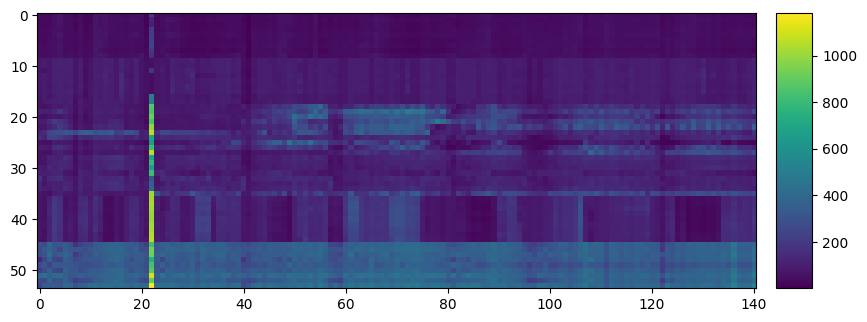

In [6]:
print(matrice_vert.shape)
#Looking for a pixels
img = (matrice_vert/8).astype(int)
#grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10))
ax = plt.gca()
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

# Kmeans

## Bande vert

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


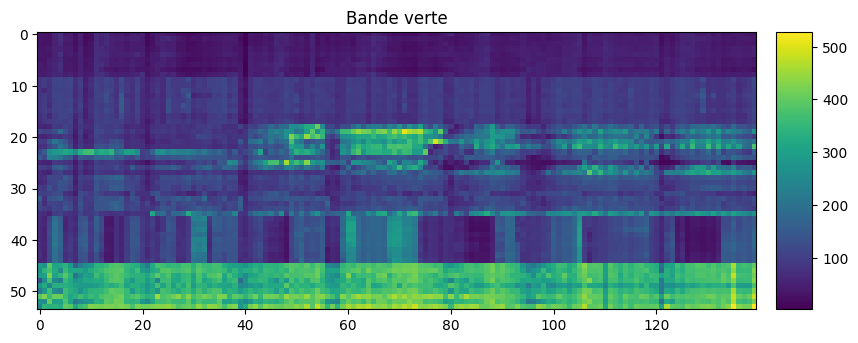

In [7]:
chelou = np.argmax(matrice_vert[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_vert,chelou,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande verte')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [8]:
km_vert = KMeans(n_clusters=6, random_state=42).fit(matrice)
yhat = km_vert.predict(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,accuracy,f1_score
0,0.814815,0.755735


,calinski_harabasz_score
0,112.743417


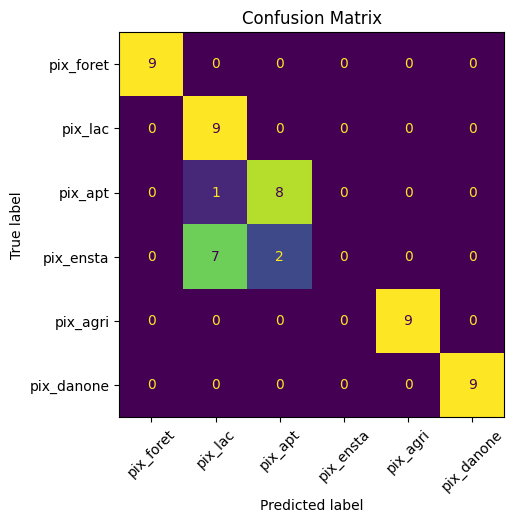

In [9]:
eval_bandevert = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_bandevert.confusion_matrix()
display(eval_bandevert.metrics_classif())
display(eval_bandevert.metrics_clustering())

## Bande bleu

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


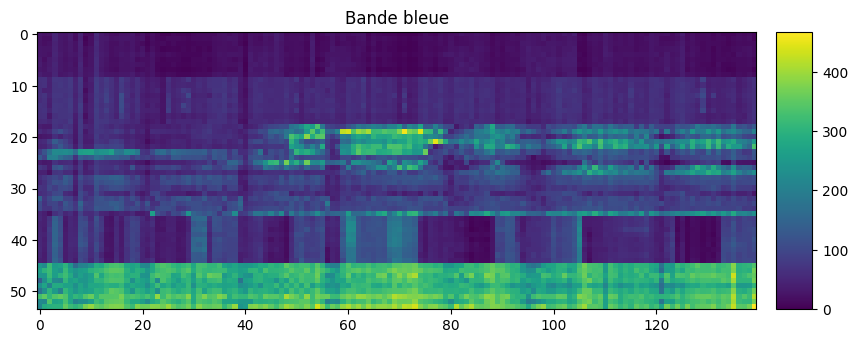

In [ ]:
chelou = np.argmax(matrice_bleu[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_bleu,chelou,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande bleue')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [ ]:
km_bleu = KMeans(n_clusters=6, random_state=42).fit(matrice)
yhat = km_bleu.predict(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 3 2 3 3 3 3 3 0 3 3 3 2 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5] [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5]


,accuracy,f1_score
0,0.759259,0.707361


,calinski_harabasz_score
0,115.742225


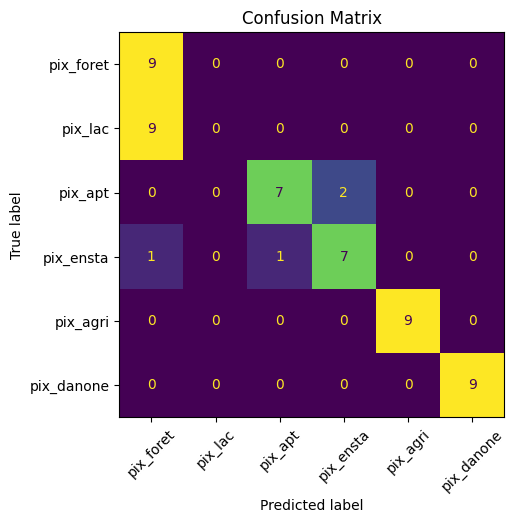

In [ ]:
eval_bandebleu = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_bandebleu.confusion_matrix()
display(eval_bandebleu.metrics_classif())
display(eval_bandebleu.metrics_clustering())

## Bande rouge

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


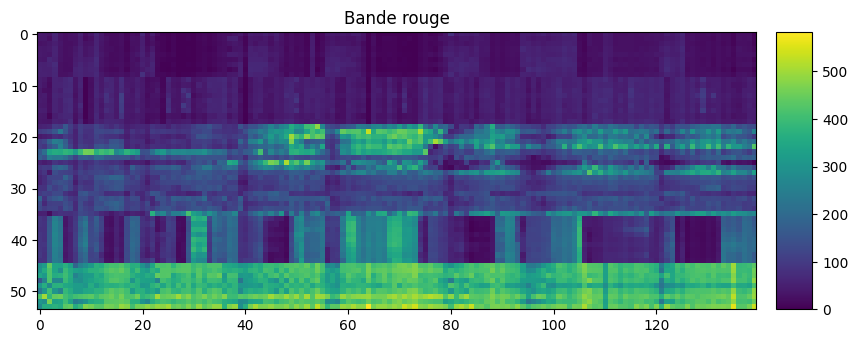

In [ ]:
chelou = np.argmax(matrice_rouge[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_rouge,chelou,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande rouge')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [ ]:
km_rouge = KMeans(n_clusters=6, random_state=42).fit(matrice)
yhat = km_rouge.predict(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 2 2 2 3 3 3 2 3 3 3 3 3 3 3 2 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5] [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5]


,accuracy,f1_score
0,0.722222,0.665278


,calinski_harabasz_score
0,123.421189


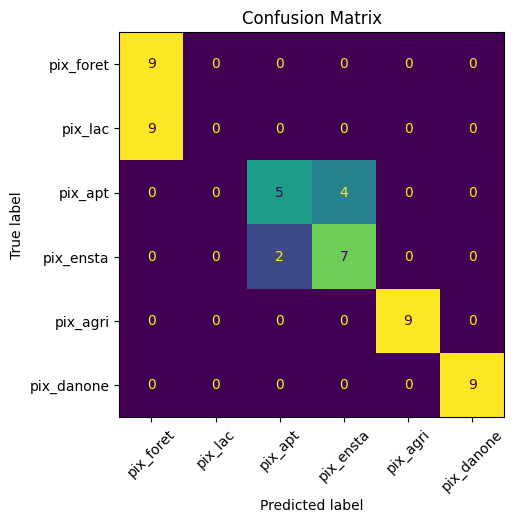

In [ ]:
eval_banderouge = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_banderouge.confusion_matrix()
display(eval_banderouge.metrics_classif())
display(eval_banderouge.metrics_clustering())

## Bande NIR

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


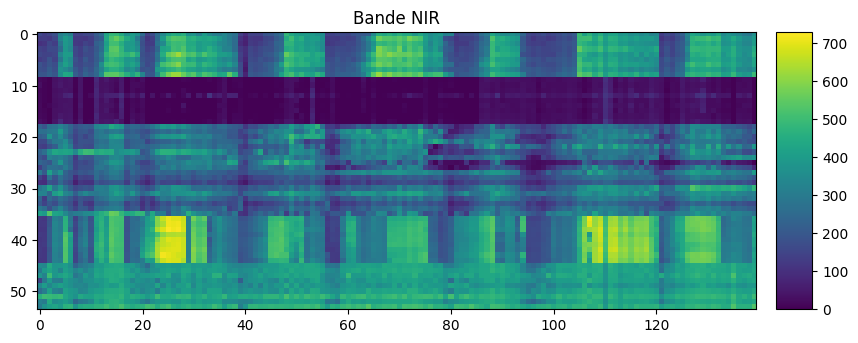

In [ ]:
chelou = np.argmax(matrice_nir[50])
display(f'image chelou = {chelou}')
matrice = np.delete(matrice_nir,chelou,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande NIR')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [ ]:
km_nri = KMeans(n_clusters=6, random_state=42).fit(matrice)
yhat = km_nri.predict(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2 3 3 2 3 3 2 2 2 3 3 2 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5] [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5]


,accuracy,f1_score
0,0.851852,0.85


,calinski_harabasz_score
0,113.732166


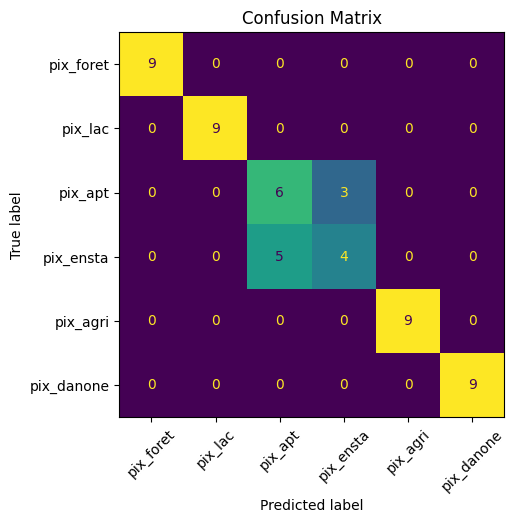

In [ ]:
eval_nir = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_nir.confusion_matrix()
display(eval_nir.metrics_classif())
display(eval_nir.metrics_clustering())

### NDVI

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


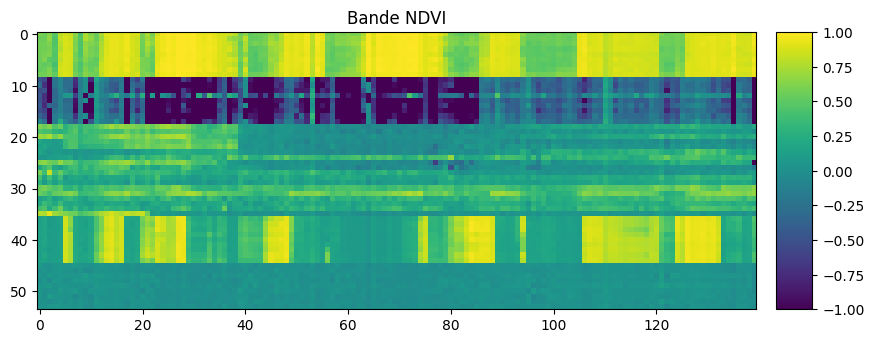

In [9]:
display(f'image chelou = {22}')
matrice = np.delete(matrice_ndvi,22,1)
# Displaying pixels
img = matrice
plt.figure(figsize=(10,10))
plt.title('Bande NDVI')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [10]:
km_ndvi = KMeans(n_clusters=6, random_state=42).fit(matrice)
yhat = km_ndvi.predict(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,accuracy,f1_score
0,0.907407,0.90463


,calinski_harabasz_score
0,172.604559


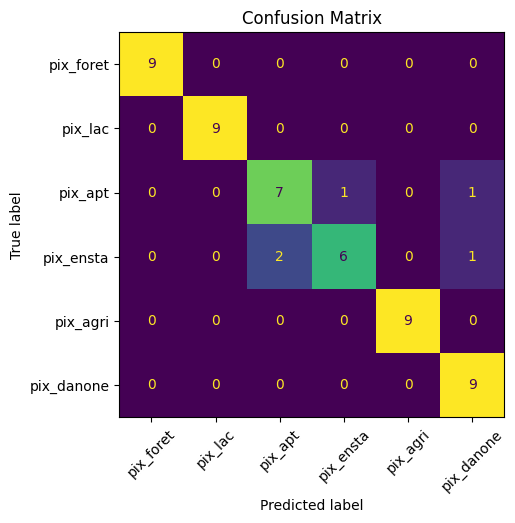

In [11]:
eval_ndvi = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_ndvi.confusion_matrix()
display(eval_ndvi.metrics_classif())
display(eval_ndvi.metrics_clustering())

### NDWI

'image chelou = 22'

Axes(0.125,0.11;0.775x0.77)


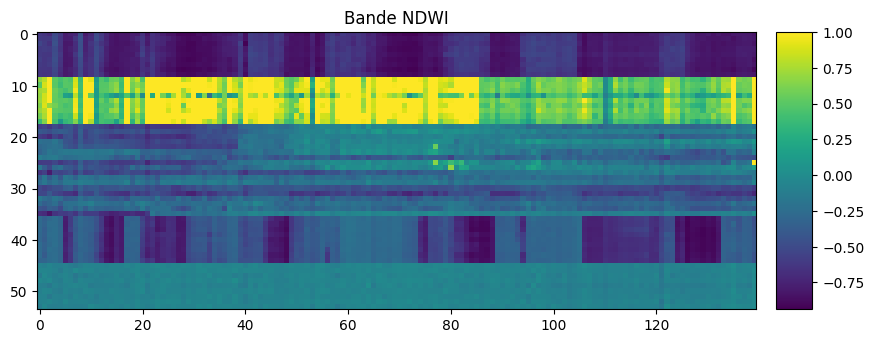

In [10]:
display(f'image chelou = {22}')
matrice = np.delete(matrice_ndwi,22,1)
# Displaying pixels
img = matrice
plt.figure(figsize=(10,10))
plt.title('Bande NDWI')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [11]:
km_ndwi = KMeans(n_clusters=6, random_state=42).fit(matrice)
yhat = km_ndwi.predict(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,accuracy,f1_score
0,0.888889,0.882919


,calinski_harabasz_score
0,281.450166


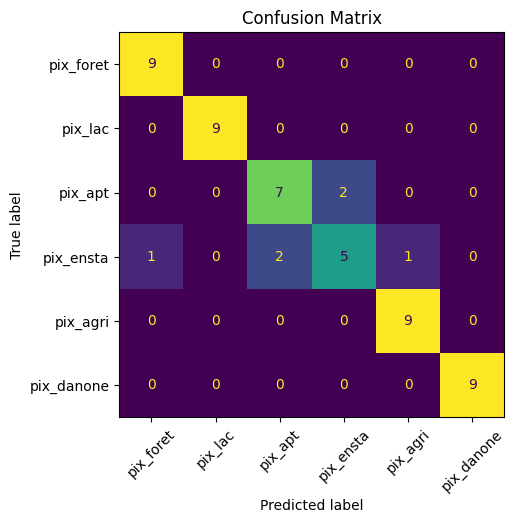

In [12]:
eval_ndwi = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_ndwi.confusion_matrix()
display(eval_ndwi.metrics_classif())
display(eval_ndwi.metrics_clustering())

# DBSCAN

### Bande verte

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

Nombre de clusters: 2
Nombre de points aberrantes: 7


,accuracy,f1_score
0,0.382979,0.230496


,calinski_harabasz_score
0,97.49862


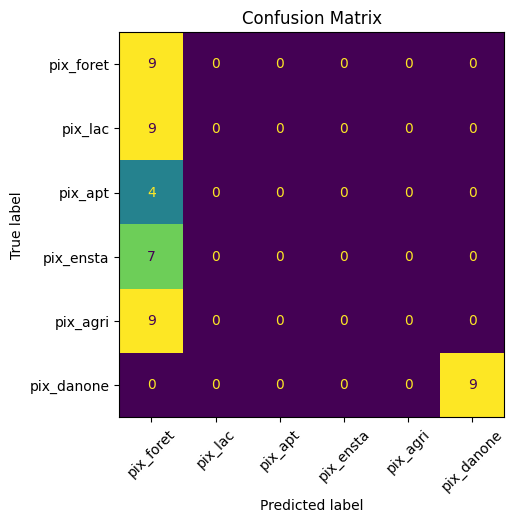

In [16]:
matrice = np.delete(matrice_vert,22,1)
db_ = DBSCAN(eps=6000, min_samples=3).fit(matrice)
yhat = db_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de points aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande bleu

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

Nombre de clusters: 2
Nombre de point aberrantes: 7


,accuracy,f1_score
0,0.382979,0.230496


,calinski_harabasz_score
0,110.329286


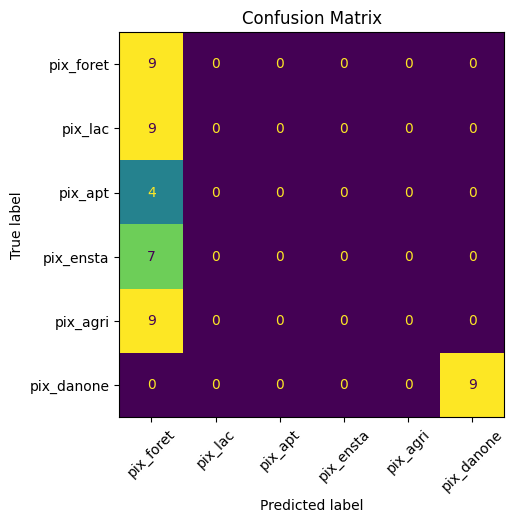

In [17]:
matrice = np.delete(matrice_bleu,22,1)
db_ = DBSCAN(eps=6000, min_samples=4).fit(matrice)
yhat = db_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande rouge

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  1, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3])

Nombre de clusters: 4
Nombre de point aberrantes: 4


,accuracy,f1_score
0,0.6,0.512281


,calinski_harabasz_score
0,61.331305


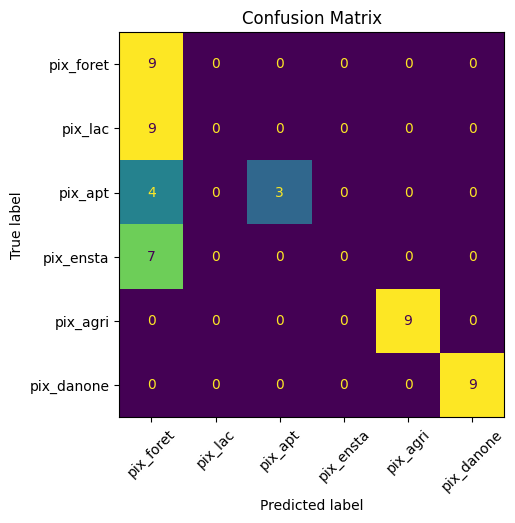

In [18]:
matrice = np.delete(matrice_rouge,22,1)
db_ = DBSCAN(eps=8000, min_samples=4).fit(matrice)
yhat = db_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande NIR

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2, -1,  2, -1,  2,  2,  2,  2,  2,  4,  2,  2,
        2, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4])

Nombre de clusters: 5
Nombre de point aberrantes: 3


,accuracy,f1_score
0,0.843137,0.769006


,calinski_harabasz_score
0,96.248815


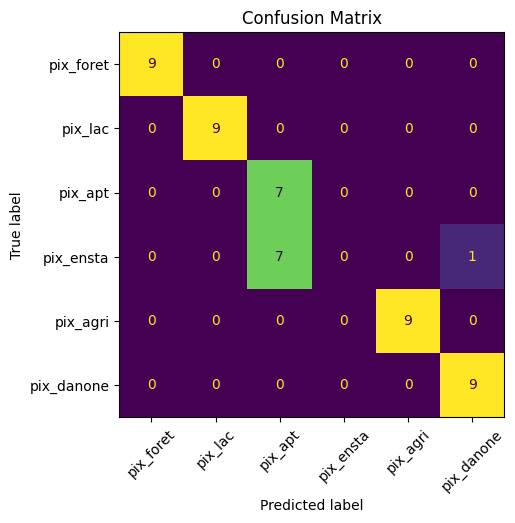

In [19]:
matrice = np.delete(matrice_nir,22,1)
db_ = DBSCAN(eps=7000, min_samples=4).fit(matrice)
yhat = db_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande NDVI

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,
        2,  2,  2])

Nombre de clusters: 4
Nombre de point aberrantes: 1


,accuracy,f1_score
0,0.660377,0.583333


,calinski_harabasz_score
0,130.819708


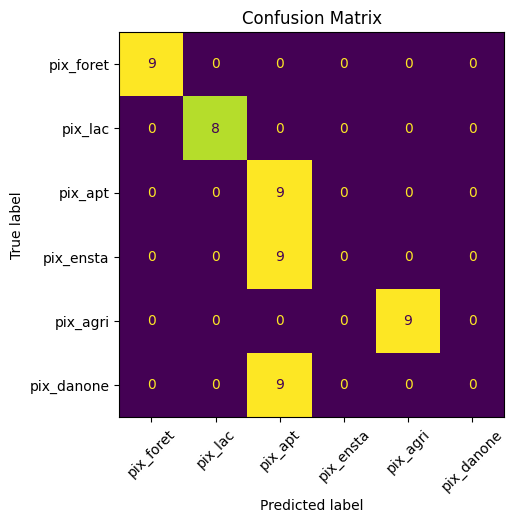

In [20]:
matrice = np.delete(matrice_ndvi,22,1)
db_ = DBSCAN(eps=2.5, min_samples=4).fit(matrice)
yhat = db_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande NDWI

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  3,  3,  2,  2, -1,  3,  3,  3,  3,  3,  3,
        3,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,
        3,  3,  3])

Nombre de clusters: 5
Nombre de point aberrantes: 2


,accuracy,f1_score
0,0.807692,0.748366


,calinski_harabasz_score
0,109.97741


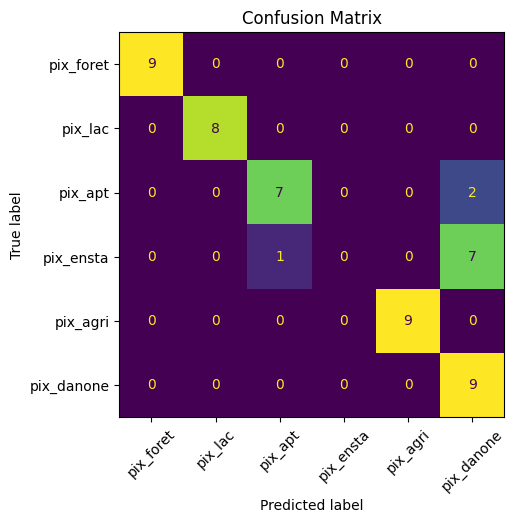

In [22]:
matrice = np.delete(matrice_ndwi,22,1)
db_ = DBSCAN(eps=2, min_samples=4).fit(matrice)
yhat = db_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

# OPTICS

### Bande verte

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  1,  2,  2,
        2, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4])

Nombre de clusters: 5
Nombre de point aberrantes: 10


,accuracy,f1_score
0,0.954545,0.802969


,calinski_harabasz_score
0,81.2884


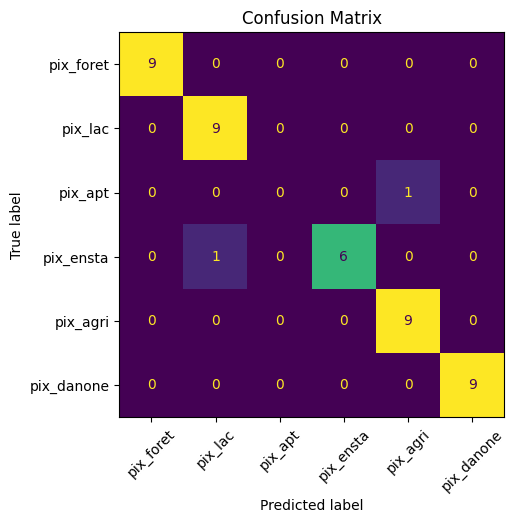

In [23]:
matrice = np.delete(matrice_vert,22,1)
opt_ = OPTICS(eps=6000).fit(matrice)
yhat = opt_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande blue

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  3, -1, -1, -1, -1, -1,  2, -1, -1, -1,  2,  2, -1,  1,  2,  2,
        2, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4])

Nombre de clusters: 5
Nombre de point aberrantes: 10


,accuracy,f1_score
0,0.931818,0.788012


,calinski_harabasz_score
0,83.344056


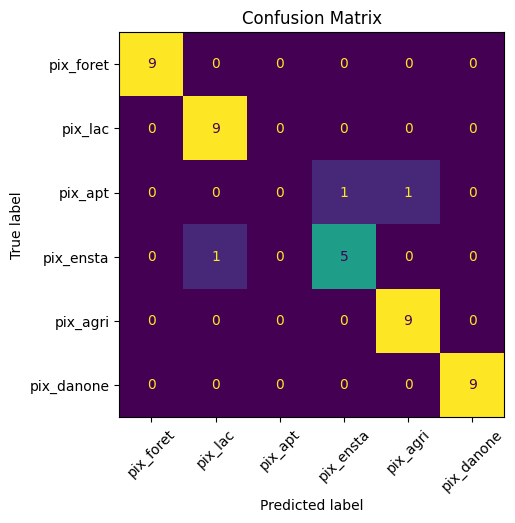

In [37]:
matrice = np.delete(matrice_bleu,22,1)
opt_ = OPTICS(eps=6000).fit(matrice)
yhat = opt_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande rouge

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1,  2,  2,  2,  2,  2,  2,
        2, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4])

Nombre de clusters: 5
Nombre de point aberrantes: 10


,accuracy,f1_score
0,0.977273,0.822222


,calinski_harabasz_score
0,106.257775


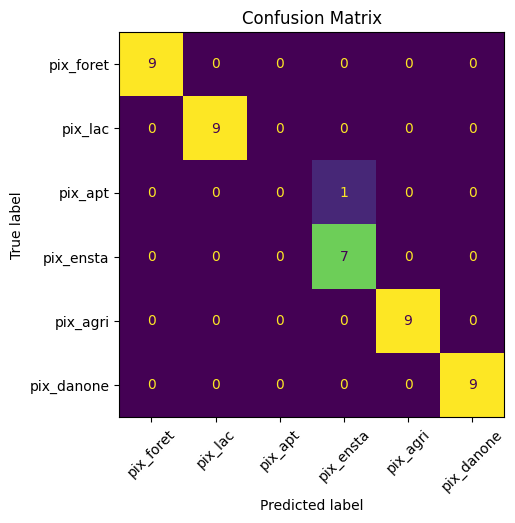

In [28]:
matrice = np.delete(matrice_rouge,22,1)
opt_ = OPTICS(eps=6000).fit(matrice)
yhat = opt_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande NIR

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  2,  2,  2,  2,  2, -1,  2, -1,  2,  2,  2,  2,  2,  0,  2,  2,
        2, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

Nombre de clusters: 5
Nombre de point aberrantes: 3


,accuracy,f1_score
0,0.843137,0.769006


,calinski_harabasz_score
0,95.103781


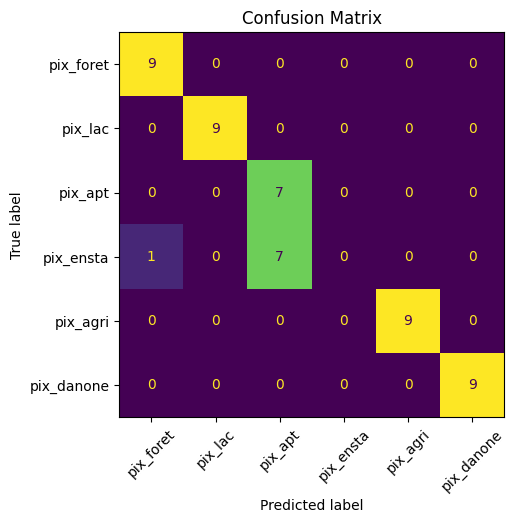

In [36]:
matrice = np.delete(matrice_nir,22,1)
opt_ = OPTICS(eps=6000).fit(matrice)
yhat = opt_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande NDVI

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  5,  5, -1,  5,  5,  5,  5,
        5,  3,  3,  3,  3,  3,  1, -1,  3, -1, -1, -1,  1, -1, -1,  1,  1,
        1, -1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2])

Nombre de clusters: 6
Nombre de point aberrantes: 8


,accuracy,f1_score
0,0.978261,0.968661


,calinski_harabasz_score
0,95.158811


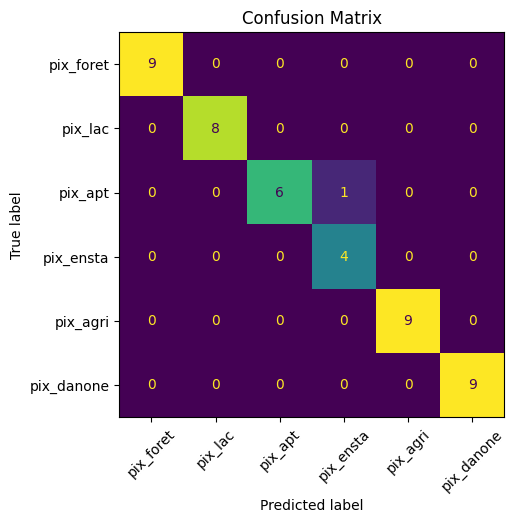

In [34]:
matrice = np.delete(matrice_ndvi,22,1)
opt_ = OPTICS(eps=3000).fit(matrice)
yhat = opt_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande NDWI

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  2,  2,  2,  2,  2,  1,  1,  2,  2, -1,  1,  1,  1, -1,  1,  1,
        1,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

Nombre de clusters: 5
Nombre de point aberrantes: 2


,accuracy,f1_score
0,0.826923,0.75264


,calinski_harabasz_score
0,192.814305


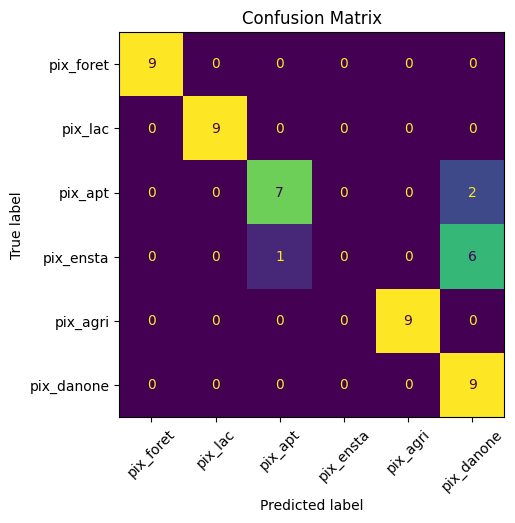

In [35]:
matrice = np.delete(matrice_ndwi,22,1)
opt_ = OPTICS(eps=3000).fit(matrice)
yhat = opt_.labels_
display(yhat)
n_clusters = len(set(yhat)) - (1 if -1 in yhat else 0)
n_aberrantes = list(yhat).count(-1)
print("Nombre de clusters: %d" % n_clusters)
print("Nombre de point aberrantes: %d" % n_aberrantes)
eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

## CHA

### Bande verte

Nombre de clusters: 6
Nombre de point aberrantes: 0


,accuracy,f1_score
0,0.814815,0.755735


,calinski_harabasz_score
0,112.743417


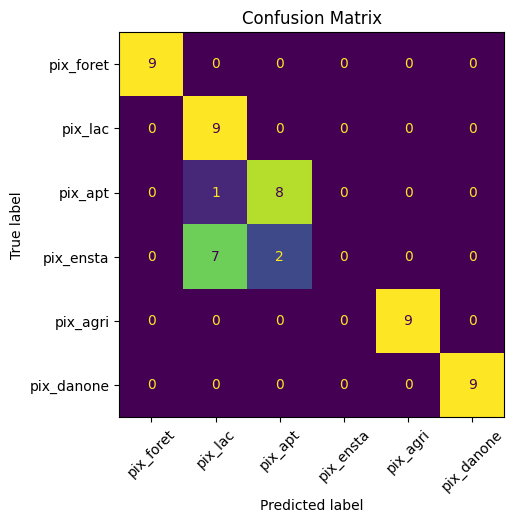

In [47]:
matrice = np.delete(matrice_vert,22,1)
cha_ = AgglomerativeClustering(n_clusters = 6).fit(matrice)
yhat = cha_.labels_

eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande Bleue

,accuracy,f1_score
0,0.740741,0.691684


,calinski_harabasz_score
0,113.453249


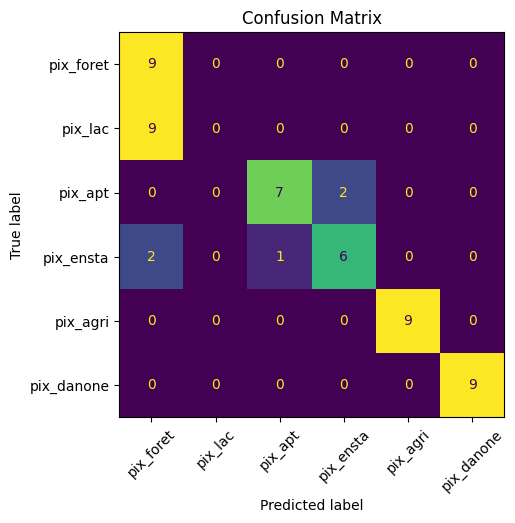

In [48]:
matrice = np.delete(matrice_bleu,22,1)
cha_ = AgglomerativeClustering(n_clusters = 6).fit(matrice)
yhat = cha_.labels_

eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande rouge

,accuracy,f1_score
0,0.777778,0.72205


,calinski_harabasz_score
0,129.051894


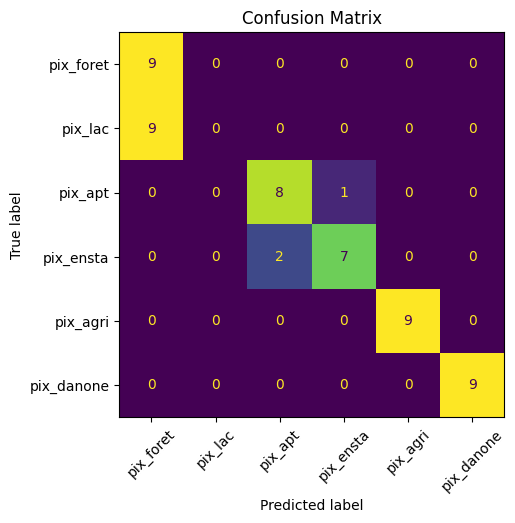

In [49]:
matrice = np.delete(matrice_rouge,22,1)
cha_ = AgglomerativeClustering(n_clusters = 6).fit(matrice)
yhat = cha_.labels_

eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande NIR

,accuracy,f1_score
0,0.833333,0.777778


,calinski_harabasz_score
0,113.311288


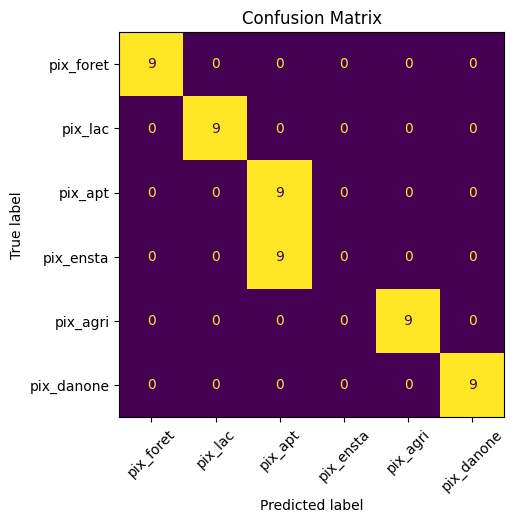

In [50]:
matrice = np.delete(matrice_nir,22,1)
cha_ = AgglomerativeClustering(n_clusters = 6).fit(matrice)
yhat = cha_.labels_

eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande NDVI

,accuracy,f1_score
0,0.925926,0.925926


,calinski_harabasz_score
0,164.509127


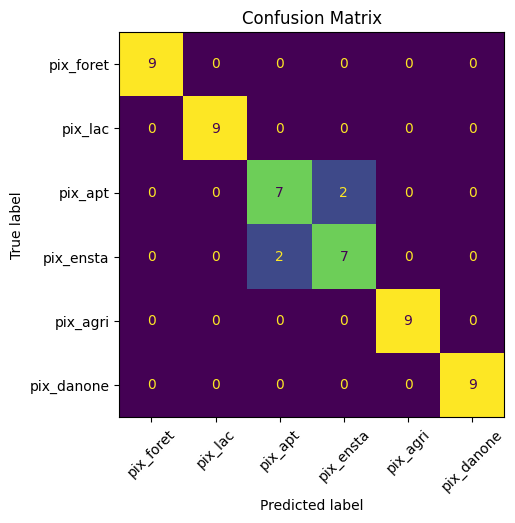

In [51]:
matrice = np.delete(matrice_ndvi,22,1)
cha_ = AgglomerativeClustering(n_clusters = 6).fit(matrice)
yhat = cha_.labels_

eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())

### Bande NDWI

,accuracy,f1_score
0,0.888889,0.883796


,calinski_harabasz_score
0,275.778268


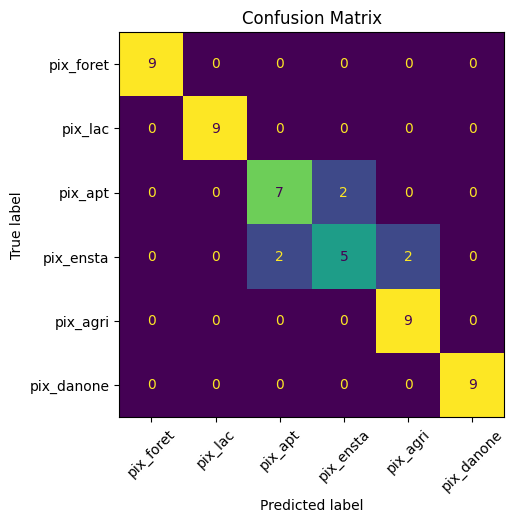

In [52]:
matrice = np.delete(matrice_ndwi,22,1)
cha_ = AgglomerativeClustering(n_clusters = 6).fit(matrice)
yhat = cha_.labels_

eval_ = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
eval_.confusion_matrix()
display(eval_.metrics_classif())
display(eval_.metrics_clustering())